In [2]:
# imports the required libraries
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from PIL import Image
from IPython.display import display

# Suicides in England

### <u>Age-standardised suicide rates per 100,000 population by sex</u>

In [3]:
# Reads a tab from an excel file into the Pandas DataFrame
df_suicide = pd.read_excel('suicides2022.xlsx', sheet_name = 'Table_2')

In [4]:
# Assigns row at index 4 as the column names
df_suicide.columns = df_suicide.iloc[4]

# Slices the dataframe for rows 5 onwards and column 1 onwards
df_suicide = df_suicide.iloc[5:, 1:]

In [5]:
# Replaces column names containing '\n' with '', effectively removing it
df_suicide.columns = df_suicide.columns.str.replace('\n', '')

# Replaces square brackets and its contents from column names using regular expression r'\[.*?\]' with '', 
# effectively removing it
df_suicide.columns = df_suicide.columns.str.replace(r'\[.*?\]', '', regex=True)

# Removes leading and trailing whitespaces from column names
df_suicide.columns = df_suicide.columns.str.strip()

# Applies the function pd.to_numeric to entire dataframe ignorng errors ensuring converision to numerical dtypes 
# where possible
df_suicide = df_suicide.apply(pd.to_numeric, errors='ignore')

# Changes column name at the 0 index to 'Area'
df_suicide.columns.values[0] = 'Area'

#Changes column name at 1 index to 'Year'
df_suicide.columns.values[1] = 'Year'

In [6]:
# Adds column names 'Area', 'Year' and column names containing Rate to a list
c1 = ['Area', 'Year'] + [i for i in df_suicide.columns if 'Rate' in i]

In [7]:
# Selects a subset of the dataframe using c1
df_suicide = df_suicide[c1]

In [8]:
# Changes column name at the 2 index to 'Area'
df_suicide.columns.values[2] = 'Persons'

# Changes column name at the 3 index to 'Males'
df_suicide.columns.values[3] = 'Males'

# Changes column name at the 4 index to 'Females'
df_suicide.columns.values[4] = 'Females'

In [9]:
# changes dataframe format from wide to long. Id_vars are the identifier columns value_vars are measured variables which
# are unpivoted to row axis
df_suicide = pd.melt(df_suicide,
                     id_vars = ['Area', 'Year'], 
                     value_vars = ['Persons', 'Males', 'Females'],
                     var_name = 'Sex',
                     value_name ='age_standardised_rate_per_100000'
                    )


In [10]:
# Sorts values of dataframe in ascending order by Sex and Year
df_suicide = df_suicide.sort_values(['Sex', 'Year'])

# Filters dataframe to rows where 'Sex' column is not equal to 'Persons'
df_suicide = df_suicide[df_suicide['Sex'] != 'Persons']

In [11]:
# Calculates the average rate for males
male_average = df_suicide[df_suicide['Sex'] == 'Males']['age_standardised_rate_per_100000'].mean()

# Calculates the average rate for females
female_average = df_suicide[df_suicide['Sex'] == 'Females']['age_standardised_rate_per_100000'].mean()

# Gets all years from 'Year' column
years = df_suicide['Year'].unique()

#Creates male average dataframe
df_male_average = pd.DataFrame({
    'Area': ['England']*len(years),
    'Year': years,
    'Sex': ['Males Average']*len(years),
    'age_standardised_rate_per_100000': [male_average]*len(years)
    })

#Creates female average dataframe
df_female_average = pd.DataFrame({
    'Area': ['England']*len(years),
    'Year':years,
    'Sex': ['Females Average']*len(years),
    'age_standardised_rate_per_100000': [female_average]*len(years)
    })

In [12]:
# concatenates all dataframes into a single dataframe
df_suicide = pd.concat([df_suicide, df_male_average, df_female_average])

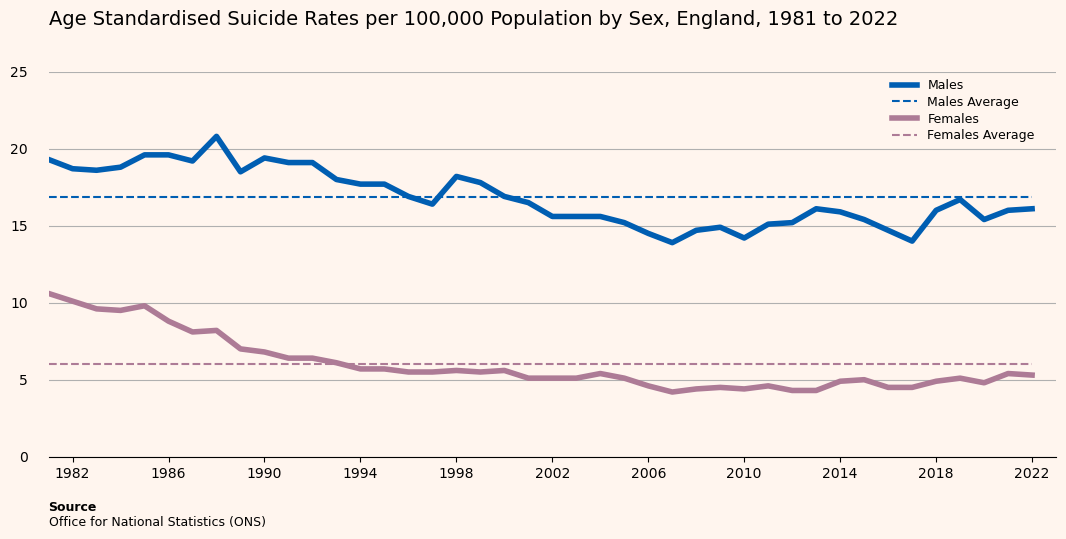

In [13]:
# creates figure with the specified figsize which defines width and height and defines background colour surrounding axes
plt.figure(figsize=(13, 5), facecolor='seashell')

# Draws a lineplot onto the figure
sns.lineplot(data = df_suicide[df_suicide['Sex'] == 'Males'], # data is for males
             x = 'Year', # year on x axis
             y = 'age_standardised_rate_per_100000', # rate on y axis
             color = '#005EB2', # colour blind friendly hex code for males
             label = 'Males', # name of line 
             linewidth =4 # Defines thickness of the line
            )

# Draws a lineplot onto the figure
sns.lineplot(data = df_suicide[df_suicide['Sex'] == 'Males Average'], # data is for males average
             x = 'Year', # year on x axis
             y = 'age_standardised_rate_per_100000', # rate on y axis
             color = '#005EB2', # colour blind friendly hex code for males
             linestyle='dashed', # uses a dashed line style
             label = 'Males Average', # name of line
             linewidth =1.5 # Thickness of line
            )

# Draws a lineplot onto the figure
sns.lineplot(data = df_suicide[df_suicide['Sex'] == 'Females'], # data is for females
             x = 'Year',  # year on x axis
             y = 'age_standardised_rate_per_100000', # rate on y axis
             color = '#AD7B96', # colour blind friendly hex code for males
             label = 'Females', # name of line 
             linewidth = 4 # Defines thickness of the line
            )

# Draws a lineplot onto the figure
sns.lineplot(data=df_suicide[df_suicide['Sex'] == 'Females Average'], # data is for females average
             x ='Year', # year on x axis
             y ='age_standardised_rate_per_100000', # rate on y axis
             color = '#AD7B96', # colour blind friendly hex code for males
             linestyle='dashed', # uses a dashed line style
             label = 'Females Average', # name of line 
             linewidth =1.5 # Defines thickness of the line
            )

# adds horizontal grid lines from y ticks on y axis
plt.grid(axis = 'y') 

# changes backgorund to colour of plot itself to 'seashell' colour
plt.gca().set_facecolor('seashell')

# Sets limits of y axss 
plt.ylim(0, 25)

#Sets limits of x axis
plt.xlim(1981, 2023)

# stes x ticks which start from 1982 going to 2022 in increments of 4
plt.xticks(range(1982, 2023, 4))

# removes tick length from y axis and creates ditance
plt.tick_params(axis = 'y', length = 0, pad = 15)

# Removes the required spines (borders) from the plot
sns.despine(top = True, right = True, left = True, bottom = False)

# Sets title for the visualisation
plt.title(label='Age Standardised Suicide Rates per 100,000 Population by Sex, England, 1981 to 2022', # title text
          fontsize=14, # size of text
          loc='left', # location of title
          y=1.1 # vertical position of title
         )

# Sets xlabel to '' essentially removing it
plt.xlabel('')

# Sets ylabel to '' essentially removing it
plt.ylabel('')

# Adds text 'Source' in the required location, font size and in bold
plt.text(1981, -3.5, 'Source', fontsize=9, fontweight='bold')

# Adds text 'Office for National Statistics (ONS)' in the required font size
plt.text(1981, -4.5, 'Office for National Statistics (ONS)', fontsize=9)

# Adds legend
plt.legend(bbox_to_anchor=(0.99, 1.01), # positions the legend as required.
           fontsize=9, #sets size of legend text
           framealpha=0, #sets transparency of legend
           facecolor='seashell', # defines legend background colour
           labelspacing=0.3 # sets vertical spacing between legend entries
          )

# displays the figure
plt.show()

### <u> Age-specific suicide</u>

In [14]:
# Read a tab from an excel file into the Pandas DataFrame
df_suicide_by_age = pd.read_excel('suicides2022.xlsx', sheet_name= 'Table_6')

In [15]:
# Assigns row at index 4 as the column names
df_suicide_by_age.columns = df_suicide_by_age.iloc[4]

# Slices the dataframe for rows 5 onwards and column 1 onwards
df_suicide_by_age = df_suicide_by_age.iloc[5:, 1:]

In [16]:
# Replaces column names containing '\n' with '', effectively removing it
df_suicide_by_age.columns = df_suicide_by_age.columns.str.replace('\n', '')

# Replaces square brackets and its contents from column names using regular expression r'\[.*?\]' with '', 
# effectively removing it
df_suicide_by_age.columns = df_suicide_by_age.columns.str.replace(r'\[.*?\]', '', regex=True)

# Removes leading and trailing whitespaces from column names
df_suicide_by_age.columns = df_suicide_by_age.columns.str.strip()

# Applies the function pd.to_numeric to entire dataframe ignorng errors ensuring converision to numerical dtypes 
# where possible
df_suicide_by_age = df_suicide_by_age.apply(pd.to_numeric, errors='ignore')

# Changes column name at the 0 index to 'Area'
df_suicide_by_age.columns.values[0] = 'Area'

#Changes column name at 2 index to 'Year'
df_suicide_by_age.columns.values[2] = 'Year'

In [17]:
# Adds column names 'Area', 'Sex', 'Year' and column names containing Rate to a list
c2 = ['Area', 'Sex', 'Year'] + [i for i in df_suicide_by_age.columns if 'Rate' in i]

# Selects a subset of the dataframe using list defined by c2
df_suicide_by_age = df_suicide_by_age[c2]

In [18]:
# Replaces ' Rate per 100,000' from column names with '' effectively removing it
df_suicide_by_age.columns = df_suicide_by_age.columns.str.replace(' Rate per 100,000', '')

<u>Males</u>

In [19]:
# filters dataframe to where sex is males
df_suicide_by_age_male = df_suicide_by_age[df_suicide_by_age['Sex']== 'Males']

#drops 'Area', 'Sex', '10-14' columns from dataframe
df_suicide_by_age_male = df_suicide_by_age_male.drop(['Area', 'Sex', '10-14'], axis=1)

# resets dataframe index
df_suicide_by_age_male = df_suicide_by_age_male.reset_index(drop=True)

# Sorts values of dataframe in ascending order by Year
df_suicide_by_age_male = df_suicide_by_age_male.sort_values(['Year'])

In [20]:
# Sets the DataFrame index using the Year column
df_suicide_by_age_male = df_suicide_by_age_male.set_index('Year')

In [21]:
# Removes index name from Dataframe by setting it to None
df_suicide_by_age_male.index.name = None

# Removes column name from Dataframe by setting it to None
df_suicide_by_age_male.columns.name = None

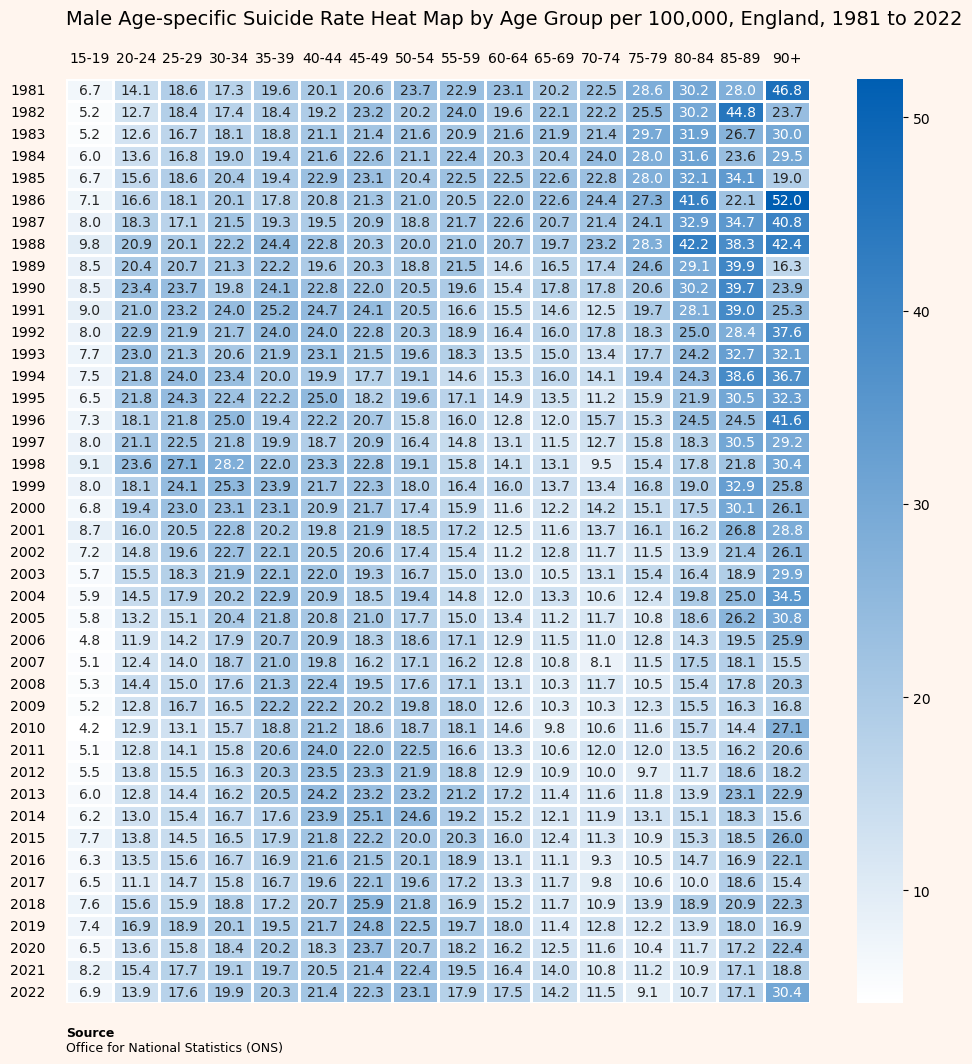

In [22]:
# creates a colour map from white to '#005EB2'
cm_males = LinearSegmentedColormap.from_list(name='white_to_blue', colors= ['white', '#005EB2'])

# creates figure with the specified figsize which defines width and height and defines background colour surrounding axes
plt.figure(figsize=(12, 12), facecolor='seashell')

#Plots heatmap
sns.heatmap(data=df_suicide_by_age_male, # data is for males
            cmap=cm_males, # colormap used is the one defined for males
            linewidths=1, # sets the width of the lines that divide each cell
            annot=True, # Set to True to make values in cells visible
            fmt='.1f' # formats values to 1 decimal plaxe
           )

# sets x axis ticks to appear on the top 
plt.gca().xaxis.set_ticks_position('top')

# Sets x tick rotation to 0 ensuring ticks remain horizontal
plt.xticks(rotation=0)

# Sets y tick rotation to 0 ensuring ticks remain horizontal
plt.yticks(rotation=0)

# removes tick length from y axis and creates distance
plt.tick_params(axis = 'x', length = 0, pad = 10)

# removes tick length from y axis and creates distance
plt.tick_params(axis = 'y', length = 0, pad = 15)

# Sets title for the visualisation
plt.title(label='Male Age-specific Suicide Rate Heat Map by Age Group per 100,000, England, 1981 to 2022', #title text
          fontsize=14, #size of text
          loc='left', #location of title text
          y=1.05# vertical positioning of title
         )

# Adds text 'Source' in the required location, font size and in bold
plt.text(0, 43.5, 'Source', fontsize=9, fontweight='bold')

# Adds text 'Office for National Statistics (ONS)' in the required font size
plt.text(0, 44.2, 'Office for National Statistics (ONS)', fontsize=9)

# Show the plot
plt.show()

<u>Females</u>

In [23]:
# filters dataframe to where sex is females
df_suicide_by_age_female = df_suicide_by_age[df_suicide_by_age['Sex']== 'Females']

#drops 'Area', 'Sex', '10-14' columns from dataframe
df_suicide_by_age_female = df_suicide_by_age_female.drop(['Area', 'Sex', '10-14'], axis=1)

# resets dataframe index
df_suicide_by_age_female = df_suicide_by_age_female.reset_index(drop=True)

# Sorts values of dataframe in ascending order by Year
df_suicide_by_age_female = df_suicide_by_age_female.sort_values(['Year'])

In [24]:
# Sets the DataFrame index using the Year column
df_suicide_by_age_female = df_suicide_by_age_female.set_index('Year')

In [25]:
# Removes index name from Dataframe by setting it to None
df_suicide_by_age_female.index.name = None

# Removes column name from Dataframe by setting it to None
df_suicide_by_age_female.columns.name = None

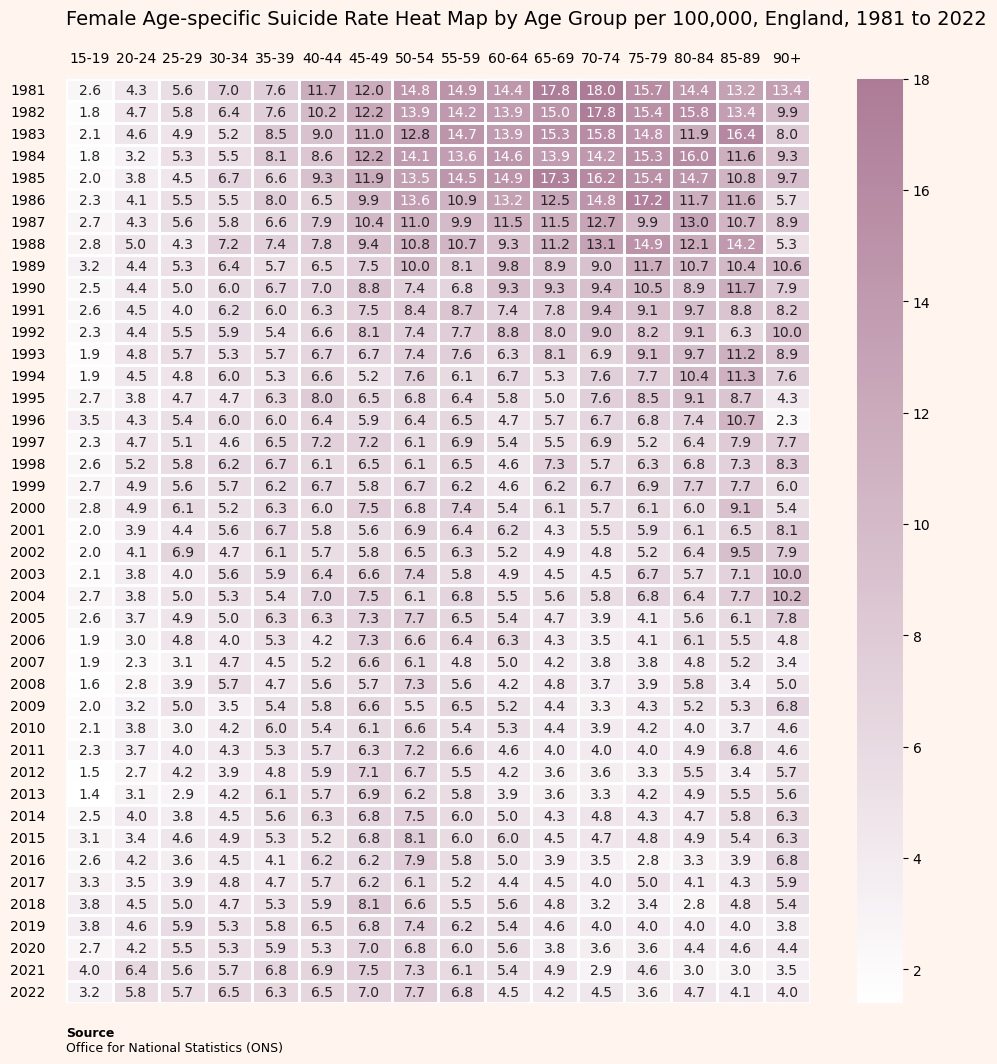

In [26]:
# creates a colour map for females from white to '#AD7B96'
cm_females = LinearSegmentedColormap.from_list(name='white_to_pink', colors= ['white', '#AD7B96'])

# creates figure with the specified figsize which defines width and height and defines background colour surrounding axes
plt.figure(figsize=(12, 12), facecolor='seashell')

#Plots heatmap
sns.heatmap(data=df_suicide_by_age_female, # data is for females
            cmap=cm_females, # colormap used is the one defined for females
            linewidths=1, # sets the width of the lines that divide each cell
            annot=True, # Set to True to make values in cells visible
            fmt='.1f' # formats values to 1 decimal place
           )

# sets x axis ticks to appear on the top 
plt.gca().xaxis.set_ticks_position('top')

# Sets x tick rotation to 0 ensuring ticks remain horizontal
plt.tick_params(axis = 'x', length = 0, pad = 10)

# Sets y tick rotation to 0 ensuring ticks remain horizontal
plt.tick_params(axis = 'y', length = 0, pad = 15)

# Sets title for the visualisation
plt.title(label='Female Age-specific Suicide Rate Heat Map by Age Group per 100,000, England, 1981 to 2022', # title text
          fontsize=14, # size of text
          loc='left', # location of title
          y=1.05 # vertical position of title
         )


# Adds text 'Source' in the required location, font size and in bold
plt.text(0, 43.5, 'Source', fontsize=9, fontweight='bold')

# Adds text 'Office for National Statistics (ONS)' in the required font size
plt.text(0, 44.2, 'Office for National Statistics (ONS)', fontsize=9)


# displays the plot
plt.show()

### <u>deaths by region</u>

In [27]:
# Reads a tab from an excel file into the Pandas DataFrame
df_suicide_by_region = pd.read_excel('suicides2022.xlsx', sheet_name= 'Table_4')

In [28]:
# Assigns row at index 4 as the column names
df_suicide_by_region.columns = df_suicide_by_region.iloc[4]

# Slices the dataframe for rows 5 onwards and all columns
df_suicide_by_region = df_suicide_by_region.iloc[5:, :]

In [29]:
# Replaces column names containing '\n' with '', effectively removing it
df_suicide_by_region.columns = df_suicide_by_region.columns.str.replace('\n', '')

# Replaces square brackets and its contents from column names using regular expression r'\[.*?\]' with '', 
# effectively removing it
df_suicide_by_region.columns = df_suicide_by_region.columns.str.replace(r'\[.*?\]', '', regex=True)

# Removes leading and trailing whitespaces from column names
df_suicide_by_region.columns = df_suicide_by_region.columns.str.strip()

# Applies the function pd.to_numeric to entire dataframe ignorng errors ensuring converision to numerical dtypes 
# where possible
df_suicide_by_region = df_suicide_by_region.apply(pd.to_numeric, errors='ignore')

# Changes column name at the 0 index to 'Area'
df_suicide_by_region.columns.values[0] = 'Group'

# Changes column name at 2 index to 'Region'
df_suicide_by_region.columns.values[2] = 'Region'


In [30]:
# Adds column names 'Group', 'Area code', 'Region' and column names containing Rate to a list
c3 = ['Group', 'Area code', 'Region'] + [i for i in df_suicide_by_region.columns if 'Rate' in i]

In [31]:
# Selects a subset of the dataframe using list c3
df_suicide_by_region = df_suicide_by_region[c3]

# Replaces column names containing ' Rate per 100,000'  with '', effectively removing it
df_suicide_by_region.columns = df_suicide_by_region.columns.str.replace(' Rate per 100,000', '')

# creates a new dataframe column which is populated by mean values for all rows of the dataframe from columns 3 onwards
df_suicide_by_region['Average Rate per 100,000 (1981 - 2022)'] = df_suicide_by_region.iloc[:, 3:].mean(axis=1)

# Selects required columns from the Dataframe
df_suicide_by_region = df_suicide_by_region[['Group', 'Area code', 'Region', 'Average Rate per 100,000 (1981 - 2022)']]

<u>Males</u>

In [32]:
# filters dataframe to where sex is males
df_suicide_by_region_males = df_suicide_by_region[df_suicide_by_region['Group'] == 'Males']

In [33]:
# reads in shape file as a geopandas dataframe
map_df = gpd.read_file('RGN_DEC_2022_EN_BUC.shp')

# renames 'RGN22NM' column to 'Region'
map_df.rename(columns={'RGN22NM': 'Region'}, inplace=True)

# merges map dataframe with male dataframe
map_df_males = pd.merge(map_df, df_suicide_by_region_males, on='Region', how='left')

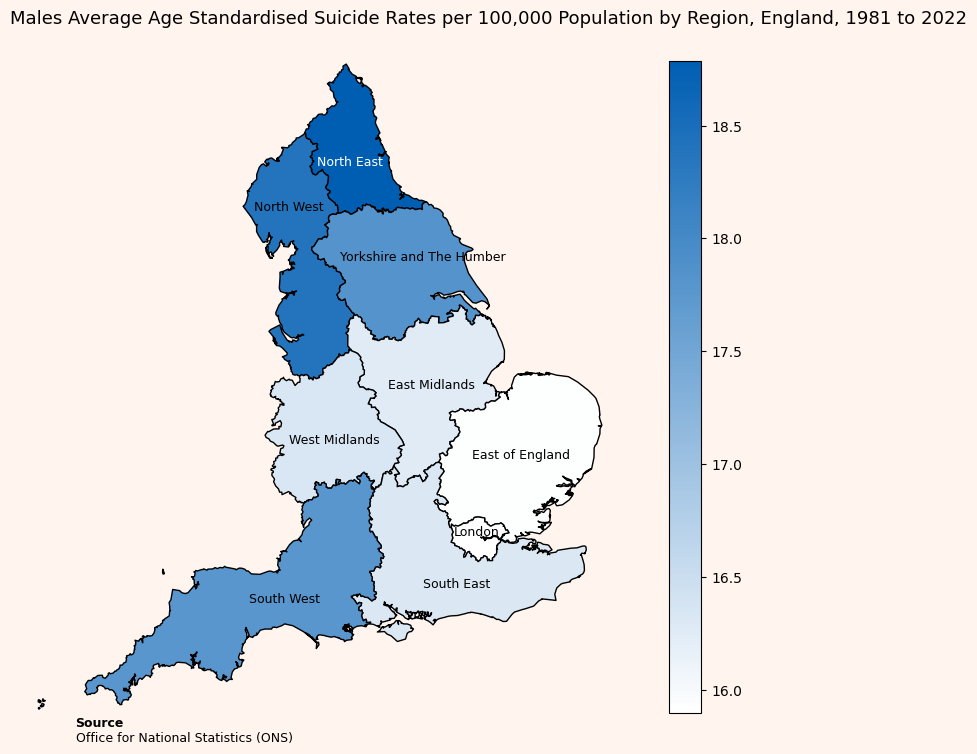

In [34]:
# creates fig and axes objects assigned to fig and ax using plt.subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 11), facecolor='seashell')

# plots the choropleth map
map_df_males.plot(column='Average Rate per 100,000 (1981 - 2022)', #The column values the plot coloring will be based on
                  ax=ax, #axes to draw plot on
                  legend=True,#adds a legend
                  cmap=cm_males, #uses the colour map defined for males
                  edgecolor='black', # colour used at the border of each region
                  linewidth=1, #thickness of edges
                  legend_kwds={'shrink': 0.77} # shrinks legend of chorpleth map
                 )

# Adds text to corresponding regions
ax.text(368000, 555000, 'North East', fontsize=9, color='white')
ax.text(305000, 510000, 'North West', fontsize=9,  color='black')
ax.text(392000, 460000, 'Yorkshire and The Humber', fontsize=9,  color='black')
ax.text(440000, 330000, 'East Midlands', fontsize=9,  color='black')
ax.text(340000, 275000, 'West Midlands', fontsize=9, color='black')
ax.text(525000, 260000, 'East of England', fontsize=9, color='black')
ax.text(506000, 182000, 'London', fontsize=9, color='black')
ax.text(475000, 130000, 'South East', fontsize=9, color='black')
ax.text(300000, 115000, 'South West', fontsize=9, color='black')

# hides visual coomponents of x and y axis
ax.set_axis_off()

#adds title
plt.title(label='Males Average Age Standardised Suicide Rates per 100,000 Population by Region, England, 1981 to 2022', # title text
          fontsize=13, # size of text
          loc='left', # location of title
          y=1 # vertical position of title
         )

# Adds text 'Source' in the required location, font size and in bold
ax.text(125000, -10000, 'Source', fontsize=9, fontweight='bold')

# Adds text 'Office for National Statistics (ONS)' in the required location and font size
ax.text(125000, -25000, 'Office for National Statistics (ONS)', fontsize=9)
    
# displays visual
plt.show()

<u>Females</u>

In [35]:
# filters dataframe to where sex is males
df_suicide_by_region_females = df_suicide_by_region[df_suicide_by_region['Group'] == 'Females']

In [36]:
# merges map dataframe with female dataframe
map_df_females = pd.merge(map_df, df_suicide_by_region_females, on='Region', how='left')

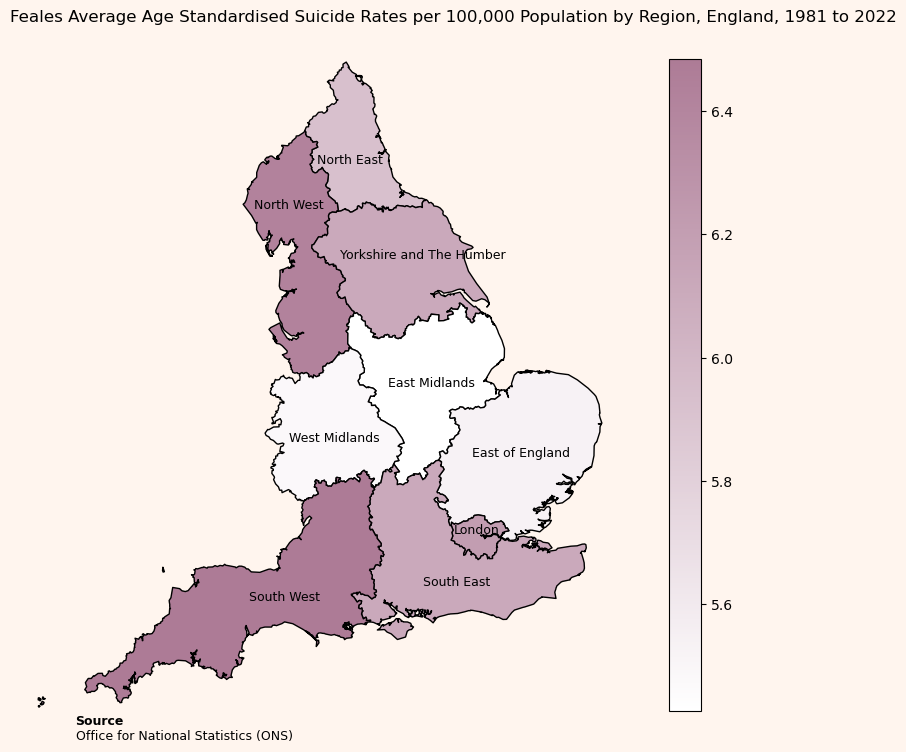

In [37]:
# creates fig and axes objects assigned to fig and ax using plt.subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 11), facecolor='seashell')

# plots the choropleth map
map_df_females.plot(column='Average Rate per 100,000 (1981 - 2022)', #The column values the plot coloring will be based on
                  ax=ax, #axes to draw plot on
                  legend=True, #adds a legend
                  cmap=cm_females, #uses the colour map defined for females
                  edgecolor='black', # colour used at the border of each region
                  linewidth=1, #thickness of edges
                  legend_kwds={'shrink': 0.77} # shrinks legend of chorpleth map
                 )

# Adds text to corresponding regions
ax.text(368000, 555000, 'North East', fontsize=9, color='black')
ax.text(305000, 510000, 'North West', fontsize=9,  color='black')
ax.text(392000, 460000, 'Yorkshire and The Humber', fontsize=9,  color='black')
ax.text(440000, 330000, 'East Midlands', fontsize=9,  color='black')
ax.text(340000, 275000, 'West Midlands', fontsize=9, color='black')
ax.text(525000, 260000, 'East of England', fontsize=9, color='black')
ax.text(506000, 182000, 'London', fontsize=9, color='black')
ax.text(475000, 130000, 'South East', fontsize=9, color='black')
ax.text(300000, 115000, 'South West', fontsize=9, color='black')

# hides visual coomponents of x and y axis
ax.set_axis_off()

#adds title
plt.title(label='Feales Average Age Standardised Suicide Rates per 100,000 Population by Region, England, 1981 to 2022',  # title text
          fontsize=12, # size of text
          loc='left', # location of title
          y=1 # vertical position of title
         )

# Adds text 'Source' in the required location, font size and in bold
ax.text(125000, -10000, 'Source', fontsize=9, fontweight='bold')

# Adds text 'Office for National Statistics (ONS)' in the required location and font size
ax.text(125000, -25000, 'Office for National Statistics (ONS)', fontsize=9)
    
# displays plot   
plt.show()

# Prison custody suicides

### <u>Prison suicides and SMR</u>

In [38]:
# Reads a tab from an excel file into the Pandas DataFrame
df_prison_suicides_smr = pd.read_excel('deathsinprisoncustodydataset20082019.xlsx', sheet_name= 'Table 2')

In [39]:
# Assigns row at index 4 as the column names
df_prison_suicides_smr.columns = df_prison_suicides_smr.iloc[4]

# Slices the dataframe for rows 5 onwards and column 1 onwards
df_prison_suicides_smr = df_prison_suicides_smr.iloc[7:, :]

# Slices the dataframe again for all rows until the 10th, and column 1 up to 4
df_prison_suicides_smr = df_prison_suicides_smr.iloc[:10, 1:4]

# Changes column name at the 0 index to 'periods'
df_prison_suicides_smr.columns.values[0] = 'period'

# Changes column name at the 1 index to 'deaths'
df_prison_suicides_smr.columns.values[1] = 'deaths'

# replaces '2017-2019 5' with '2017-2019' in the period column
df_prison_suicides_smr['period'] = df_prison_suicides_smr['period'].replace('2017-2019 5', '2017-2019')

# Resets the index without adding the index as a column
df_prison_suicides_smr = df_prison_suicides_smr.reset_index(drop=True)

# Applies the function pd.to_numeric to entire dataframe ignorng errors ensuring converision to numerical dtypes 
# where possible
df_prison_suicides_smr = df_prison_suicides_smr.apply(pd.to_numeric, errors='ignore')

In [40]:
df_prison_suicides_smr = df_prison_suicides_smr[1::2]

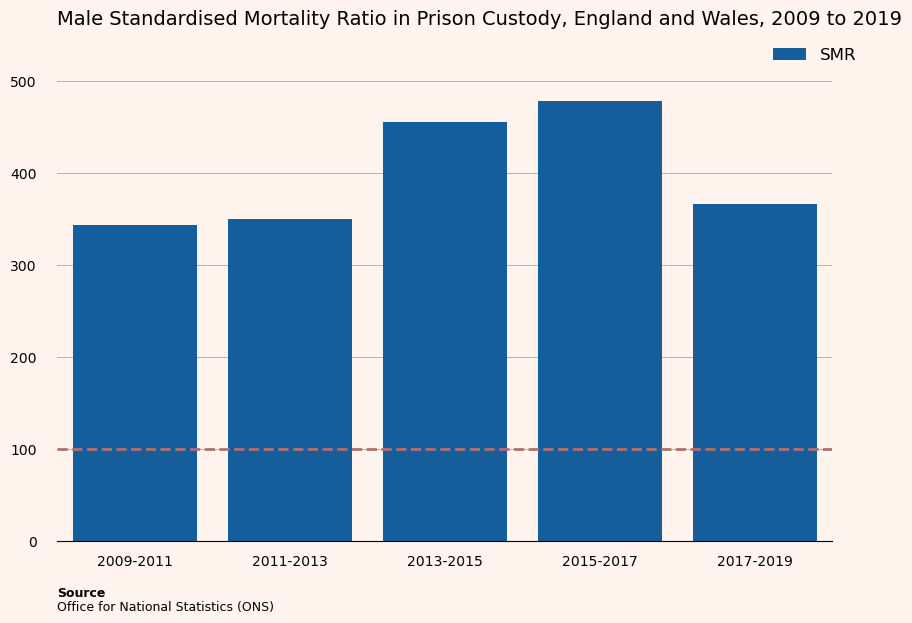

In [41]:
# creates figure with the specified figsize which defines width and height and defines background colour surrounding axes
plt.figure(figsize=(10, 6), facecolor='seashell')

# Sets title for the visualisation
plt.title(label='Male Standardised Mortality Ratio in Prison Custody, England and Wales, 2009 to 2019',
          fontsize=14, 
          loc='left', 
          y=1.1
         )

# adds # adds horizontal grid lines from y ticks on y axis with zorder lower than barplot to not overlap barplot
plt.grid(axis = 'y', linewidth = 0.7, zorder=1)

# produces the barplot visualisation
sns.barplot(data=df_prison_suicides_smr, 
            x = 'period', 
            y = 'SMR', 
            color= '#005EB2', 
            label='SMR', 
            zorder=2)

# changes backgorund to colour of plot itself to 'seashell' colour
plt.gca().set_facecolor('seashell')

# adds horizontal line across y axis at value 100
plt.axhline(y=100, color='#B36F6F', linestyle='--', linewidth=2)

# removes tick length from x axis and creates distance
plt.tick_params(axis = 'x', length = 0, pad = 10)

# removes tick length from y axis and creates distance
plt.tick_params(axis = 'y', length = 0, pad = 15)

# Removes the required spines (borders) from the plot
sns.despine(top = True, right = True, left = True, bottom = False)


# Sets xlabel to '' essentially removing it
plt.xlabel('')

# Sets ylabel to '' essentially removing it
plt.ylabel('')

# Adds text 'Source' in the required location, font size and in bold
plt.text(-0.5, -60, 'Source', fontsize=9, fontweight='bold')

# Adds text 'Office for National Statistics (ONS)' in the required font size
plt.text(-0.5, -75, 'Office for National Statistics (ONS)', fontsize=9)

# Adds legend
plt.legend(bbox_to_anchor=(1.05, 1.1), 
           facecolor='seashell', 
           framealpha=0, 
           fontsize=12, 
           labelspacing=0.3)

# Shows plot
plt.show()

### <u>Prison suicides and ASR</u>

In [42]:
# Reads a tab from an excel file into the Pandas DataFrame
df_prison_suicides_asr = pd.read_excel('deathsinprisoncustodydataset20082019.xlsx', sheet_name= 'Table 4')

In [43]:
# Assigns row at index 5 as the column names
df_prison_suicides_asr.columns = df_prison_suicides_asr.iloc[5]

# Slices the dataframe for rows at index 6 to 16 and all columns
df_prison_suicides_asr = df_prison_suicides_asr.iloc[6:16, :]

# Slices the dataframe for rows at index 0 to 10 onwards and columns at index 1 to 11
df_prison_suicides_asr = df_prison_suicides_asr.iloc[:10, 1:11]

# Changes column name at the 0 index to 'period'
df_prison_suicides_asr.columns.values[0] = 'period'

# Changes column name at index 2 to 'male_asr_prison'
df_prison_suicides_asr.columns.values[2] = 'male_asr_prison'

# Changes column name at index 9 to 'male_asr_gen_pop'
df_prison_suicides_asr.columns.values[9] = 'male_asr_gen_pop'

# replaces '2017-2019 5' in column 'period' with '2017-2019'
df_prison_suicides_asr['period'] = df_prison_suicides_asr['period'].replace('2017-2019 5', '2017-2019')


In [44]:
# fileters dataframe to have 'period', 'male_asr_prison', 'male_asr_gen_pop' columns only. resetsindex and drops it
df_prison_suicides_asr = df_prison_suicides_asr[['period', 'male_asr_prison', 'male_asr_gen_pop']].reset_index(drop=True)

In [45]:
# changes dataframe format from wide to long. Id_vars are the identifier columns value_vars are measured variables which
# are unpivoted to row axis
df_prison_suicides_asr = df_prison_suicides_asr.melt(id_vars=['period'], 
                                                     value_vars=['male_asr_prison', 'male_asr_gen_pop'],
                                                     var_name='group', 
                                                     value_name='ASR')

In [46]:
# filters dataframe to male prison population
df_prison_suicides_asr_male_pris = df_prison_suicides_asr[df_prison_suicides_asr['group']== 'male_asr_prison']

# filters dataframe to male general population
df_prison_suicides_asr_male_gen_pop = df_prison_suicides_asr[df_prison_suicides_asr['group']== 'male_asr_gen_pop']

In [47]:
# slices dataframe dataframe to keep every other row beginning from row 1
df_prison_suicides_asr_male_pris = df_prison_suicides_asr_male_pris[1::2]

# slices dataframe dataframe to keep every other row beginning from row 1
df_prison_suicides_asr_male_gen_pop  = df_prison_suicides_asr_male_gen_pop[1::2]

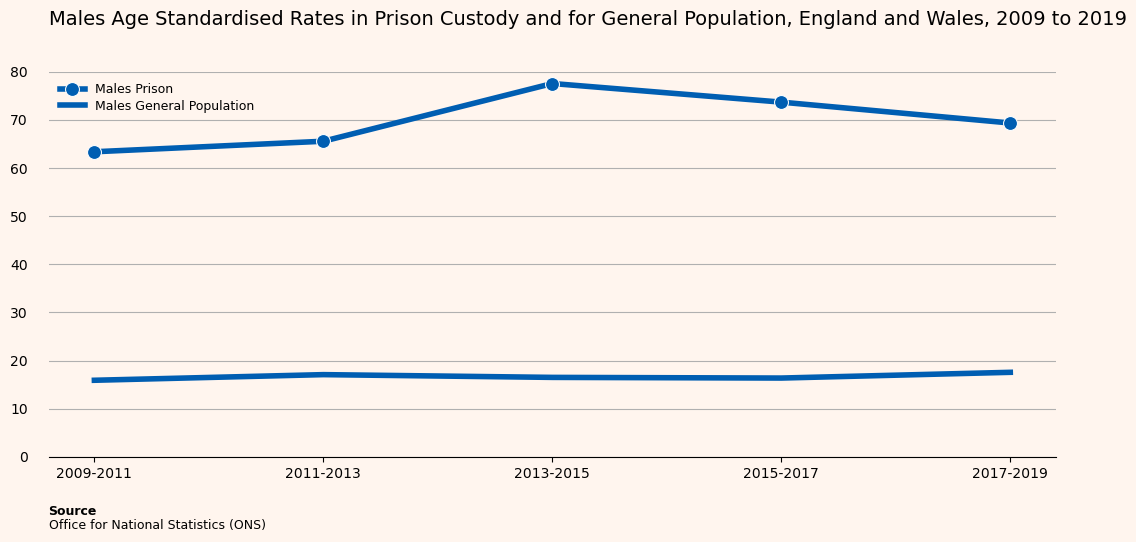

In [48]:
# creates figure with the specified figsize which defines width and height and defines background colour surrounding axes
plt.figure(figsize=(13, 5), facecolor='seashell')

# Draws a lineplot onto the figure
sns.lineplot(data = df_prison_suicides_asr_male_pris,
             x = 'period', 
             y = 'ASR',
             color = '#005EB2',
             label = 'Males Prison',
             linewidth =4,
             marker = 'o',
             markersize=10
            )

# Draws a lineplot onto the figure
sns.lineplot(data = df_prison_suicides_asr_male_gen_pop,
             x = 'period', 
             y = 'ASR',
             color = '#005EB2',
             label = 'Males General Population',
             linewidth =4
            )

# adds horizontal grid lines from y ticks on y axis
plt.grid(axis = 'y')

# changes backgorund to colour of plot itself to 'seashell' colour
plt.gca().set_facecolor('seashell')

# Sets limits of y axis
plt.ylim(0, 80)

# Removes the required spines (borders) from the plot
sns.despine(top = True, right = True, left = True, bottom = False)

# Sets title for the visualisation
plt.title(label='Males Age Standardised Rates in Prison Custody and for General Population, England and Wales, 2009 to 2019', 
          fontsize=14, 
          loc='left', 
          y=1.1
         )

# removes tick length from y axis and creates ditance
plt.tick_params(axis = 'y', length = 0, pad = 15)

# Adds text 'Source' in the required location, font size and in bold
plt.text(-0.2, -12, 'Source', fontsize=9, fontweight='bold')

# Adds text 'Office for National Statistics (ONS)' in the required font size
plt.text(-0.2, -15, 'Office for National Statistics (ONS)', fontsize=9)

# Sets xlabel to '' essentially removing it
plt.xlabel('')

# Sets ylabel to '' essentially removing it
plt.ylabel('')

# Adds legend
plt.legend(facecolor='seashell',
           framealpha=0, 
           fontsize=9, 
           labelspacing=0.3
          )

# displays the figure
plt.show()

# suicide among higher education students

In [49]:
# Reads a tab from an excel file into the Pandas DataFrame
df_suicides_edu_sex = pd.read_excel('studentsuicides.xlsx', sheet_name= 'Table_2')

In [50]:
# Assigns row at index 4 as the column names
df_suicides_edu_sex.columns = df_suicides_edu_sex.iloc[3]

# Replaces square brackets and its contents from column names using regular expression r'\[.*?\]' with '', 
# effectively removing it
df_suicides_edu_sex.columns = df_suicides_edu_sex.columns.str.replace(r'\[.*?\]', '', regex=True)

# Removes leading and trailing whitespaces from column names
df_suicides_edu_sex.columns = df_suicides_edu_sex.columns.str.strip()

# Slices the dataframe for rows 4 onwards and all columns until column 4
df_suicides_edu_sex = df_suicides_edu_sex.iloc[4:, :4]

#Changes column name at 1 index to 'Year'
df_suicides_edu_sex.columns.values[1] = 'Year'

# Replaces square brackets and its contents from column names using regular expression r'\[.*?\]' with '', 
# from values in the Year column effectively removing it
df_suicides_edu_sex['Year'] = df_suicides_edu_sex['Year'].astype(str).str.replace(r'\[.*?\]', '', regex=True)


In [51]:
# filteres dataframe to where year is not '2016/17 to 2019/20'
df_suicides_edu_sex2 = df_suicides_edu_sex[df_suicides_edu_sex['Year'] != '2016/17 to 2019/20']

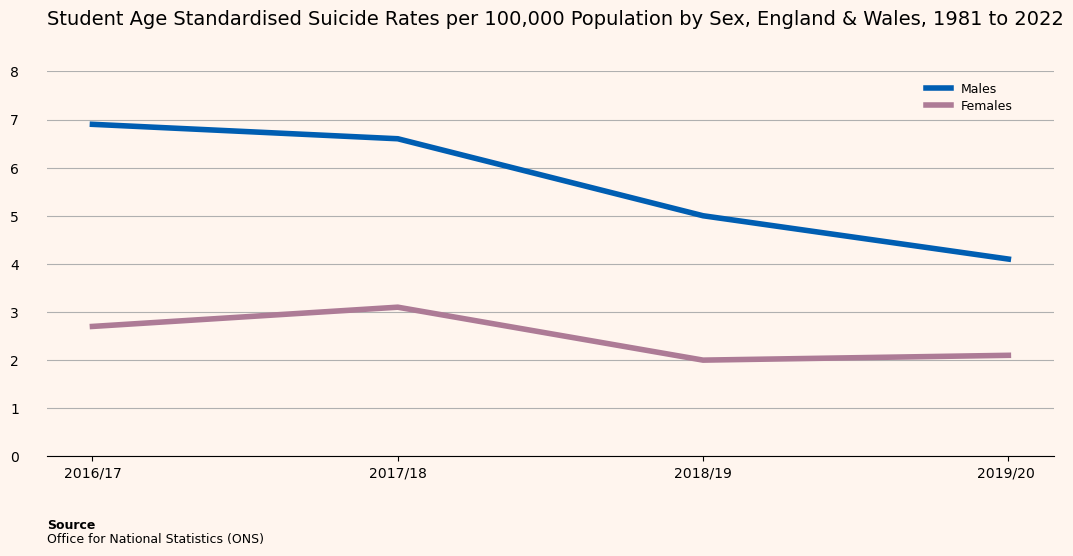

In [52]:
# creates figure with the specified figsize which defines width and height and defines background colour surrounding axes
plt.figure(figsize=(13, 5), facecolor='seashell')

# Draws a lineplot onto the figure
sns.lineplot(data = df_suicides_edu_sex2[df_suicides_edu_sex2['Sex'] == 'Males'],
             x = 'Year', 
             y = 'Rate per 100,000 student',
             color = '#005EB2',
             label = 'Males',
             linewidth =4
            )

# Draws a lineplot onto the figure
sns.lineplot(data = df_suicides_edu_sex2[df_suicides_edu_sex2['Sex'] == 'Females'],
             x = 'Year', 
             y = 'Rate per 100,000 student',
             color = '#AD7B96',
             label = 'Females',
             linewidth = 4
            )

# adds horizontal grid lines from y ticks on y axis
plt.grid(axis = 'y')

# changes backgorund to colour of plot itself to 'seashell' colour
plt.gca().set_facecolor('seashell')

# Sets limits of y axis 
plt.ylim(0, 8)

# removes tick length from y axis and creates ditance
plt.tick_params(axis = 'y', length = 0, pad = 20)

# Removes the required spines (borders) from the plot
sns.despine(top = True, right = True, left = True, bottom = False)

# Sets title for the visualisation
plt.title(label='Student Age Standardised Suicide Rates per 100,000 Population by Sex, England & Wales, 1981 to 2022', 
          fontsize=14, 
          loc='left', 
          y=1.1
         )

# Sets xlabel to '' essentially removing it
plt.xlabel('')

# Sets ylabel to '' essentially removing it
plt.ylabel('')

# Adds text 'Source' in the required location, font size and in bold
plt.text(-0.15, -1.5, 'Source', fontsize=9, fontweight='bold')

# Adds text 'Office for National Statistics (ONS)' in the required font size
plt.text(-0.15, -1.8, 'Office for National Statistics (ONS)', fontsize=9)

# Adds legend
plt.legend(bbox_to_anchor=(0.97, 1.0), 
           facecolor='seashell', 
           framealpha=0, 
           fontsize=9, 
           labelspacing=0.3
          )

# displays the figure
plt.show()

In [53]:
# Reads a tab from an excel file into the Pandas DataFrame
df_suicides_edu_sex_1_of_4 = df_suicides_edu_sex[df_suicides_edu_sex['Year'] == '2016/17 to 2019/20']

# Drops columns Year and Number of deaths
df_suicides_edu_sex_1_of_4.drop(['Year', 'Number of deaths'], axis=1, inplace=True)

# creates column ID populated with 'Overall'
df_suicides_edu_sex_1_of_4['ID'] = 'Overall'

# Pivots data reshaping it
df_suicides_edu_sex_1_of_4 = df_suicides_edu_sex_1_of_4.pivot(index='ID',
                                                              columns='Sex', 
                                                              values='Rate per 100,000 student'
                                                             )
# Removes column name from Dataframe by setting it to None
df_suicides_edu_sex_1_of_4.columns.name = None 

# resets dataframe index
df_suicides_edu_sex_1_of_4 = df_suicides_edu_sex_1_of_4.reset_index()

C:\Users\University\AppData\Local\Temp\ipykernel_20972\240670803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suicides_edu_sex_1_of_4.drop(['Year', 'Number of deaths'], axis=1, inplace=True)
C:\Users\University\AppData\Local\Temp\ipykernel_20972\240670803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suicides_edu_sex_1_of_4['ID'] = 'Overall'


In [54]:
df_suicides_edu_sex_1_of_4

,ID,Females,Males
0,Overall,2.5,5.6


In [55]:
# Reads a tab from an excel file into the Pandas DataFrame
df_suicides_edu_sex_2_of_4 = pd.read_excel('studentsuicides.xlsx', sheet_name= 'Table_3')

In [56]:
# Assigns row at index 3 as the column names
df_suicides_edu_sex_2_of_4.columns = df_suicides_edu_sex_2_of_4.iloc[3]

# Replaces column names containing '\n' with '', effectively removing it
df_suicides_edu_sex_2_of_4.columns = df_suicides_edu_sex_2_of_4.columns.str.replace('\n', '')

# Replaces square brackets and its contents from column names using regular expression r'\[.*?\]' with '', 
# effectively removing it
df_suicides_edu_sex_2_of_4.columns = df_suicides_edu_sex_2_of_4.columns.str.replace(r'\[.*?\]', '', regex=True)

# Removes leading and trailing whitespaces from column names
df_suicides_edu_sex_2_of_4.columns = df_suicides_edu_sex_2_of_4.columns.str.strip()

# Slices the dataframe for rows 4 onwards and all columns
df_suicides_edu_sex_2_of_4 = df_suicides_edu_sex_2_of_4.iloc[4:, :]

# filters dataframe to where year is '2016/17 to 2019/20'
df_suicides_edu_sex_2_of_4 = df_suicides_edu_sex_2_of_4[df_suicides_edu_sex_2_of_4['Year'] == '2016/17 to 2019/20']

# filters dataframe to keep necessary columns only
df_suicides_edu_sex_2_of_4 = df_suicides_edu_sex_2_of_4[['Sex', 'Part-time Rate per 100,000 student', 'Full-time Rate per 100,000 student']]

# changes dataframe format from wide to long. Id_vars are the identifier columns value_vars are measured variables which
# are unpivoted to row axis
df_suicides_edu_sex_2_of_4 = pd.melt(df_suicides_edu_sex_2_of_4, id_vars=['Sex'], var_name='Rate Type', value_name='Rate')

# Pivots data reshaping it
df_suicides_edu_sex_2_of_4 = df_suicides_edu_sex_2_of_4.pivot(index='Rate Type', columns='Sex', values='Rate')

# Removes column name from Dataframe by setting it to None
df_suicides_edu_sex_2_of_4.columns.name = None 

# resets dataframe index
df_suicides_edu_sex_2_of_4 = df_suicides_edu_sex_2_of_4.reset_index()

# # Changes column name at the 0 index to 'ID'
df_suicides_edu_sex_2_of_4.columns.values[0] = 'ID'


In [57]:
df_suicides_edu_sex_2_of_4

,ID,Females,Males
0,"Full-time Rate per 100,000 student",2.2,5.5
1,"Part-time Rate per 100,000 student",3.6,6.4


In [58]:
# Reads a tab from an excel file into the Pandas DataFrame
df_suicides_edu_sex_3_of_4 = pd.read_excel('studentsuicides.xlsx', sheet_name= 'Table_4')

In [59]:
# Assigns row at index 3 as the column names
df_suicides_edu_sex_3_of_4.columns = df_suicides_edu_sex_3_of_4.iloc[3]

# Replaces column names containing '\n' with '', effectively removing it
df_suicides_edu_sex_3_of_4.columns = df_suicides_edu_sex_3_of_4.columns.str.replace('\n', '')

# Replaces square brackets and its contents from column names using regular expression r'\[.*?\]' with '', 
# effectively removing it
df_suicides_edu_sex_3_of_4.columns = df_suicides_edu_sex_3_of_4.columns.str.replace(r'\[.*?\]', '', regex=True)

# Removes leading and trailing whitespaces from column names
df_suicides_edu_sex_3_of_4.columns = df_suicides_edu_sex_3_of_4.columns.str.strip()

# Slices the dataframe for rows 4 onwards and all columns
df_suicides_edu_sex_3_of_4 = df_suicides_edu_sex_3_of_4.iloc[4:, :]

# filters dataframe to where year is '2016/17 to 2019/20'
df_suicides_edu_sex_3_of_4 = df_suicides_edu_sex_3_of_4[df_suicides_edu_sex_3_of_4['Year'] == '2016/17 to 2019/20']

# filters dataframe to keep necessary columns only
df_suicides_edu_sex_3_of_4 = df_suicides_edu_sex_3_of_4[['Sex', 'Undergraduate Rate per 100,000 student', 'Postgraduate Rate per 100,000 student']]

# changes dataframe format from wide to long. Id_vars are the identifier columns value_vars are measured variables which
# are unpivoted to row axis
df_suicides_edu_sex_3_of_4 = pd.melt(df_suicides_edu_sex_3_of_4, id_vars=['Sex'], var_name='ID', value_name='Rate')

# Pivots data reshaping it
df_suicides_edu_sex_3_of_4 = df_suicides_edu_sex_3_of_4.pivot(index='ID', columns='Sex', values='Rate')

# Removes column name from Dataframe by setting it to None
df_suicides_edu_sex_3_of_4.columns.name = None 

# resets dataframe index while changing rows to be in the required order
df_suicides_edu_sex_3_of_4 = df_suicides_edu_sex_3_of_4.iloc[[1, 0]].reset_index()

In [60]:
df_suicides_edu_sex_3_of_4

,ID,Females,Males
0,"Undergraduate Rate per 100,000 student",2.7,6.1
1,"Postgraduate Rate per 100,000 student",2,4.1


In [61]:
# Reads a tab from an excel file into the Pandas DataFrame
df_suicides_edu_sex_4_of_4 = pd.read_excel('studentsuicides.xlsx', sheet_name= 'Table_5')

In [62]:
# Assigns row at index 3 as the column names
df_suicides_edu_sex_4_of_4.columns = df_suicides_edu_sex_4_of_4.iloc[3]

# Replaces column names containing '\n' with '', effectively removing it
df_suicides_edu_sex_4_of_4.columns = df_suicides_edu_sex_4_of_4.columns.str.replace('\n', '')

# Replaces square brackets and its contents from column names using regular expression r'\[.*?\]' with '', 
# effectively removing it
df_suicides_edu_sex_4_of_4.columns = df_suicides_edu_sex_4_of_4.columns.str.replace(r'\[.*?\]', '', regex=True)

# Removes leading and trailing whitespaces from column names
df_suicides_edu_sex_4_of_4.columns = df_suicides_edu_sex_4_of_4.columns.str.strip()

# Slices the dataframe for rows 4 onwards and all columns
df_suicides_edu_sex_4_of_4 = df_suicides_edu_sex_4_of_4.iloc[4:, :]

# filters dataframe to where year is '2016/17 to 2019/20'
df_suicides_edu_sex_4_of_4 = df_suicides_edu_sex_4_of_4[df_suicides_edu_sex_4_of_4['Year'] == '2016/17 to 2019/20']

# filters dataframe to keep necessary columns only
df_suicides_edu_sex_4_of_4 = df_suicides_edu_sex_4_of_4[['Sex', 'First year undergraduate Rate per 100,000 student', 'Other Rate per 100,000 student']]

# changes dataframe format from wide to long. Id_vars are the identifier columns value_vars are measured variables which
# are unpivoted to row axis
df_suicides_edu_sex_4_of_4 = pd.melt(df_suicides_edu_sex_4_of_4, id_vars=['Sex'], var_name='ID', value_name='Rate')

# Pivots data reshaping it
df_suicides_edu_sex_4_of_4 = df_suicides_edu_sex_4_of_4.pivot(index='ID', columns='Sex', values='Rate')

# Removes column name from Dataframe by setting it to None
df_suicides_edu_sex_4_of_4.columns.name = None 

# resets dataframe index while changing rows to be in the required order
df_suicides_edu_sex_4_of_4.reset_index(inplace=True)

In [63]:
df_suicides_edu_sex_4_of_4

,ID,Females,Males
0,"First year undergraduate Rate per 100,000 student",2.7,7.8
1,"Other Rate per 100,000 student",2.1,4.3


In [64]:
# concatenates dataframes
df_suicides_edu_sex_tot = pd.concat([df_suicides_edu_sex_1_of_4, df_suicides_edu_sex_2_of_4, df_suicides_edu_sex_3_of_4, df_suicides_edu_sex_4_of_4])

# Changes column name at index 0 to 'Category'
df_suicides_edu_sex_tot.columns.values[0] = 'Category'

# rmeoves whitespace from column names
df_suicides_edu_sex_tot.columns = df_suicides_edu_sex_tot.columns.str.strip()

In [65]:
# changes dataframe format from wide to long. Id_vars are the identifier columns value_vars are measured variables which
# are unpivoted to row axis
df_suicides_edu_sex_tot = pd.melt(df_suicides_edu_sex_tot,
                                  id_vars = ['Category'], 
                                  value_vars = ['Males', 'Females'],
                                  var_name = 'Sex',
                                  value_name ='age_standardised_rate_per_100000'
                                 )

In [66]:
df_suicides_edu_sex_tot

,Category,Sex,age_standardised_rate_per_100000
0,Overall,Males,5.6
1,"Full-time Rate per 100,000 student",Males,5.5
2,"Part-time Rate per 100,000 student",Males,6.4
3,"Undergraduate Rate per 100,000 student",Males,6.1
4,"Postgraduate Rate per 100,000 student",Males,4.1
5,"First year undergraduate Rate per 100,000 student",Males,7.8
6,"Other Rate per 100,000 student",Males,4.3
7,Overall,Females,2.5
8,"Full-time Rate per 100,000 student",Females,2.2
9,"Part-time Rate per 100,000 student",Females,3.6


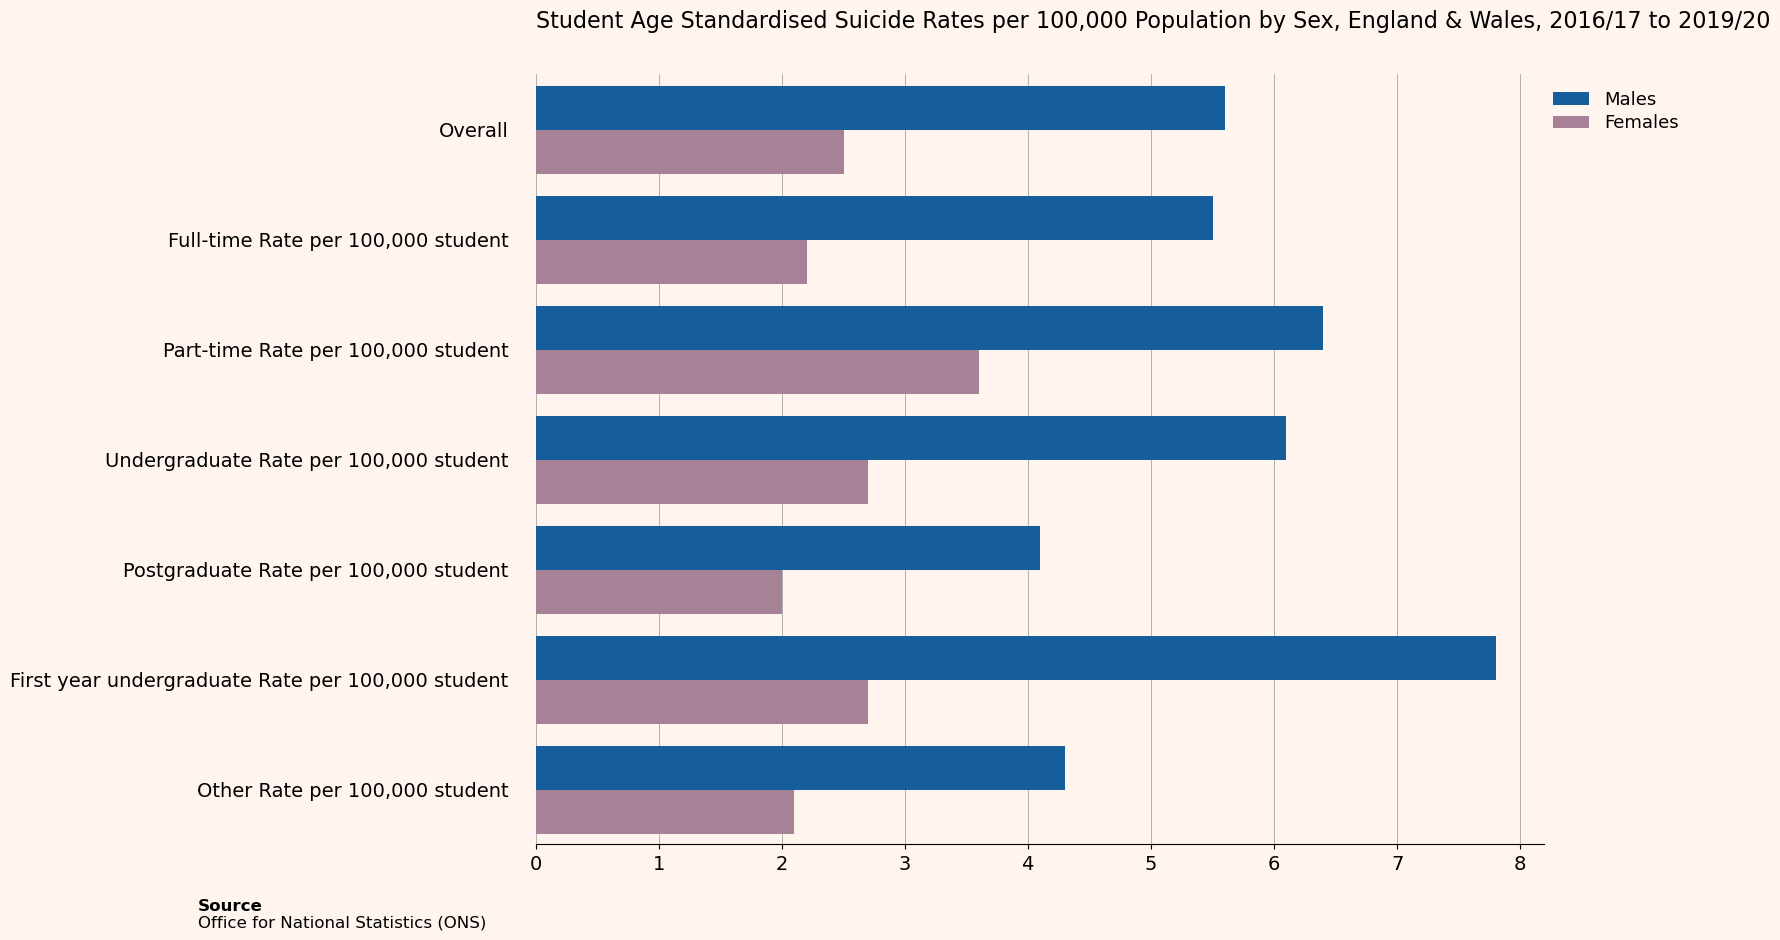

In [67]:
# creates figure with the specified figsize which defines width and height and defines background colour surrounding axes
plt.figure(figsize=(13, 10), facecolor='seashell')

# adds horizontal grid lines from x ticks on x axis
plt.grid(axis = 'x', linewidth = 0.7, zorder=1)

# Sets limits of y axis 
plt.ylim(0, 8)

# defines a color dictionary for males and females
colors = {
    'Males': '#005EB2',
    'Females': '#AD7B96'
}

# produces the bar plot
sns.barplot(df_suicides_edu_sex_tot, 
            x="age_standardised_rate_per_100000", 
            y="Category", 
            hue="Sex", 
            palette=colors, 
            zorder=2)

# changes backgorund to colour of plot itself to 'seashell' colour
plt.gca().set_facecolor('seashell')

# removes tick length from y axis and creates ditance
plt.tick_params(axis = 'y', length = 0, pad = 20)

# Removes the required spines (borders) from the plot
sns.despine(top = True, right = True, left = True, bottom = False)

# Sets title for the visualisation
plt.title(label='Student Age Standardised Suicide Rates per 100,000 Population by Sex, England & Wales, 2016/17 to 2019/20', 
          fontsize=16, 
          loc='left', 
          y=1.05
         )

# Adjusts the sizes of x ticks
plt.xticks(fontsize=14)

# Adjusts the sizes of y ticks
plt.yticks(fontsize=14)

# Sets xlabel to '' essentially removing it
plt.xlabel('')

# Sets ylabel to '' essentially removing it
plt.ylabel('')

# Adds text 'Source' in the required location, font size and in bold
plt.text(-2.75, 7.1, 'Source', fontsize=12, fontweight='bold')

# Adds text 'Office for National Statistics (ONS)' in the required font size
plt.text(-2.75, 7.25, 'Office for National Statistics (ONS)', fontsize=12)

# Adds legend
plt.legend(bbox_to_anchor=(1.15, 1.0), 
           facecolor='seashell', 
           framealpha=0, 
           fontsize=13, 
           labelspacing=0.3)

# displays the figure
plt.show()